# Importing Dataset and Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import files
uploaded = files.upload()


Saving prp.csv to prp.csv


In [3]:
df = pd.read_csv('prp.csv', encoding ='ISO-8859-1')

In [4]:
df

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk
...,...,...,...,...,...,...,...,...,...,...,...
6098,2002617,Pragalya,24,96.0,101,142,97,20.3,39,6.7,mid risk
6099,2003332,Jyoshita,38,96.0,59,129,94,20.0,39,7.0,high risk
6100,2012649,Mrimnayi,40,103.3,145,123,95,24.6,36,5.0,high risk
6101,2010533,Vardhani,21,99.0,130,152,99,23.2,47,6.6,high risk


# Basic Data Exploration

In [5]:
df.isnull().any()

,0
Patient ID,False
Name,False
Age,False
Body Temperature(F),False
Heart rate(bpm),False
Systolic Blood Pressure(mm Hg),False
Diastolic Blood Pressure(mm Hg),False
BMI(kg/m 2),False
Blood Glucose(HbA1c),False
Blood Glucose(Fasting hour-mg/dl),False


In [6]:
df.shape

(6103, 11)

In [7]:
df.columns

Index(['Patient ID', 'Name', 'Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

In [10]:
df.describe(include='all')

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
count,6.103000e+03,6103,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103
unique,NaN,5797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Ratna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high risk
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2059
mean,2.003343e+06,NaN,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752,NaN
std,6.604395e+03,NaN,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327,NaN
min,1.993365e+06,NaN,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000,NaN
25%,1.994890e+06,NaN,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000,NaN
50%,2.003000e+06,NaN,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000,NaN
75%,2.010128e+06,NaN,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000,NaN


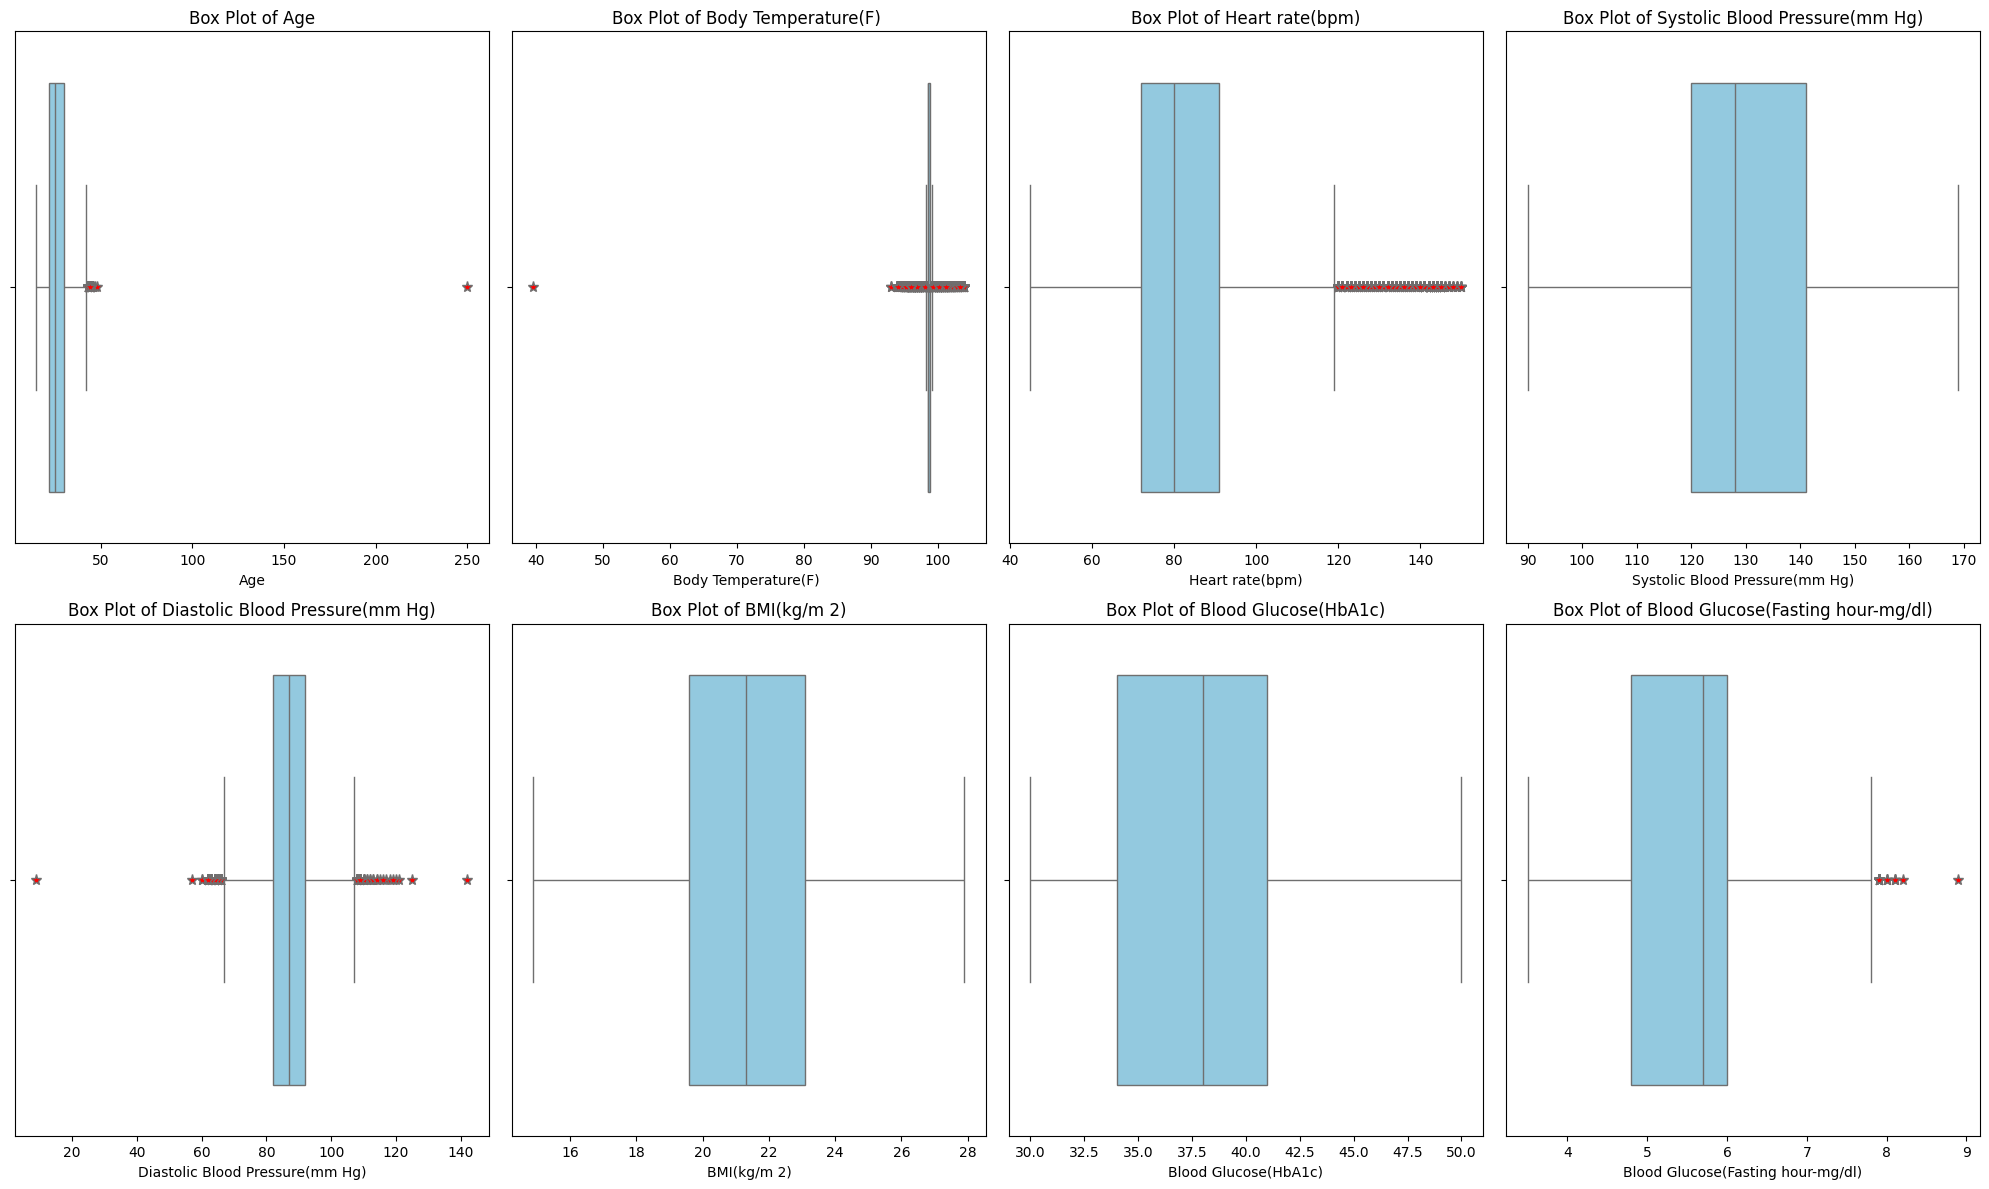

In [11]:
# List of numerical columns to analyze
columns = ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
           'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
           'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
           'Blood Glucose(Fasting hour-mg/dl)']

# Define properties for outliers
flierprops = dict(marker='*', markerfacecolor='red', markersize=8, linestyle='none')

# Define number of rows and columns for the grid
n_cols = 4
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots with defined rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each column and create a box plot with red outliers
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], color='skyblue', flierprops=flierprops, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Remove any empty subplots if columns don't fill all grids
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Removing Outliers

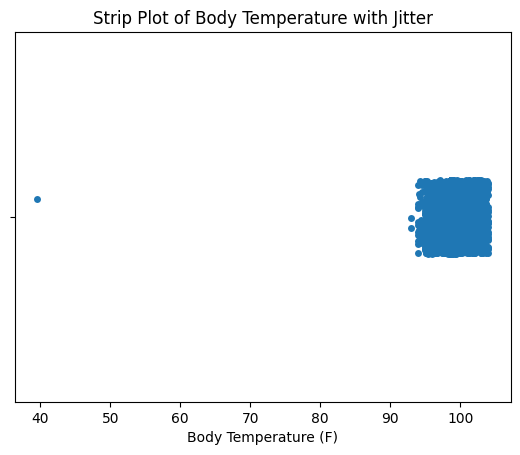

In [12]:
# Strip plot for Body Temperature with jitter
sns.stripplot(x='Body Temperature(F) ', data=df, jitter=True)

# Adding title and labels
plt.title('Strip Plot of Body Temperature with Jitter')
plt.xlabel('Body Temperature (F)')
plt.show()


In [13]:
# Remove rows where Body Temperature is less than 50
df = df[df['Body Temperature(F) '] >= 50]

print("DataFrame after removing outliers (Body Temperature < 50):")
print(df)


DataFrame after removing outliers (Body Temperature < 50):
      Patient ID       Name  Age  Body Temperature(F)   Heart rate(bpm)  \
0        1994601     Moulya   20                  97.5               91   
1        2001562       Soni   45                  97.7               99   
2        2002530   Baishali   29                  98.6               84   
3        2002114  Abhilasha   26                  99.5              135   
4        2002058     Aanaya   38                 102.5               51   
...          ...        ...  ...                   ...              ...   
6098     2002617   Pragalya   24                  96.0              101   
6099     2003332   Jyoshita   38                  96.0               59   
6100     2012649   Mrimnayi   40                 103.3              145   
6101     2010533   Vardhani   21                  99.0              130   
6102     2002215   Nivashni   29                  98.6               84   

      Systolic Blood Pressure(mm Hg)  Di

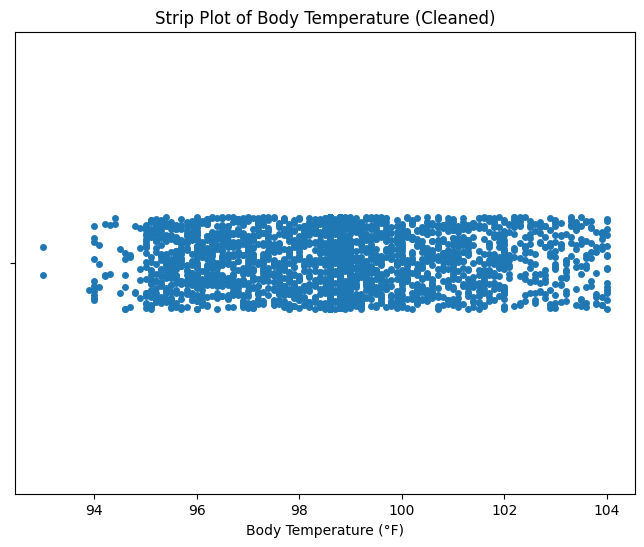

In [14]:
plt.figure(figsize=(8, 6))
sns.stripplot(x=df['Body Temperature(F) '], jitter=True)
plt.title('Strip Plot of Body Temperature (Cleaned)')
plt.xlabel('Body Temperature (°F)')
plt.show()

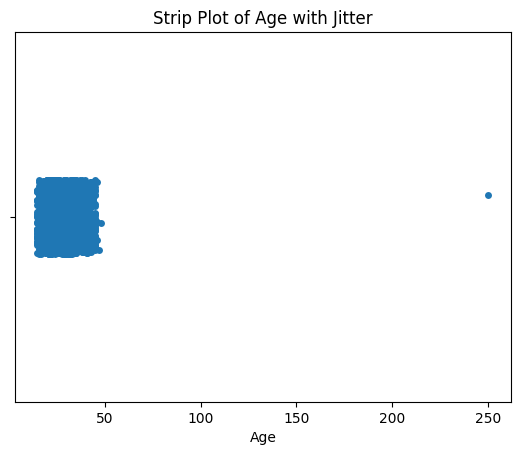

In [15]:
sns.stripplot(x='Age', data=df, jitter=True)

# Adding title and labels
plt.title('Strip Plot of Age with Jitter')
plt.xlabel('Age')
plt.show()

In [16]:
df = df[df['Age'] <= 80]
print("\nDataFrame after removing outliers (Age >80):")
print(df)


DataFrame after removing outliers (Age >80):
      Patient ID       Name  Age  Body Temperature(F)   Heart rate(bpm)  \
0        1994601     Moulya   20                  97.5               91   
1        2001562       Soni   45                  97.7               99   
2        2002530   Baishali   29                  98.6               84   
3        2002114  Abhilasha   26                  99.5              135   
4        2002058     Aanaya   38                 102.5               51   
...          ...        ...  ...                   ...              ...   
6098     2002617   Pragalya   24                  96.0              101   
6099     2003332   Jyoshita   38                  96.0               59   
6100     2012649   Mrimnayi   40                 103.3              145   
6101     2010533   Vardhani   21                  99.0              130   
6102     2002215   Nivashni   29                  98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood

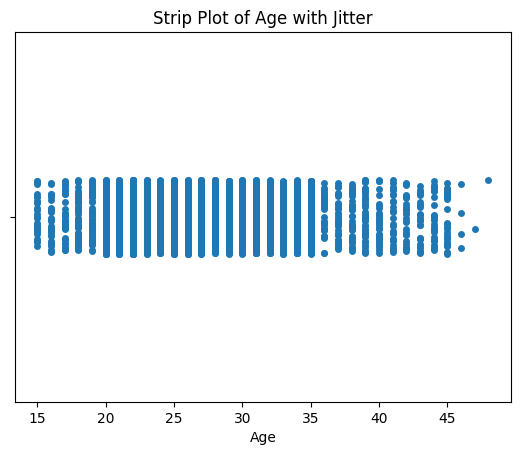

In [17]:
sns.stripplot(x='Age', data=df, jitter=True)

# Adding title and labels
plt.title('Strip Plot of Age with Jitter')
plt.xlabel('Age')
plt.show()

In [18]:
df=df.drop(['Patient ID', 'Name'],axis=1)


In [19]:
df.head(10)

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,20,97.5,91,161,100,24.9,41,5.8,high risk
1,45,97.7,99,99,94,22.1,36,5.7,high risk
2,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,26,99.5,135,161,101,23.7,46,4.5,high risk
4,38,102.5,51,106,91,18.8,38,4.3,high risk
5,21,98.6,85,142,89,22.0,30,5.6,mid risk
6,23,98.8,70,141,80,18.8,32,5.6,mid risk
7,38,101.1,141,144,84,24.8,32,5.8,high risk
8,42,103.5,144,124,83,24.7,35,6.3,high risk
9,22,100.1,62,144,92,24.3,46,6.7,high risk


In [20]:
df.shape

(6101, 9)

# Univariate Analysis

**In** **this univariate analysis we will take a closer look at each feature distribution separately and with the target variable**

Index(['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')


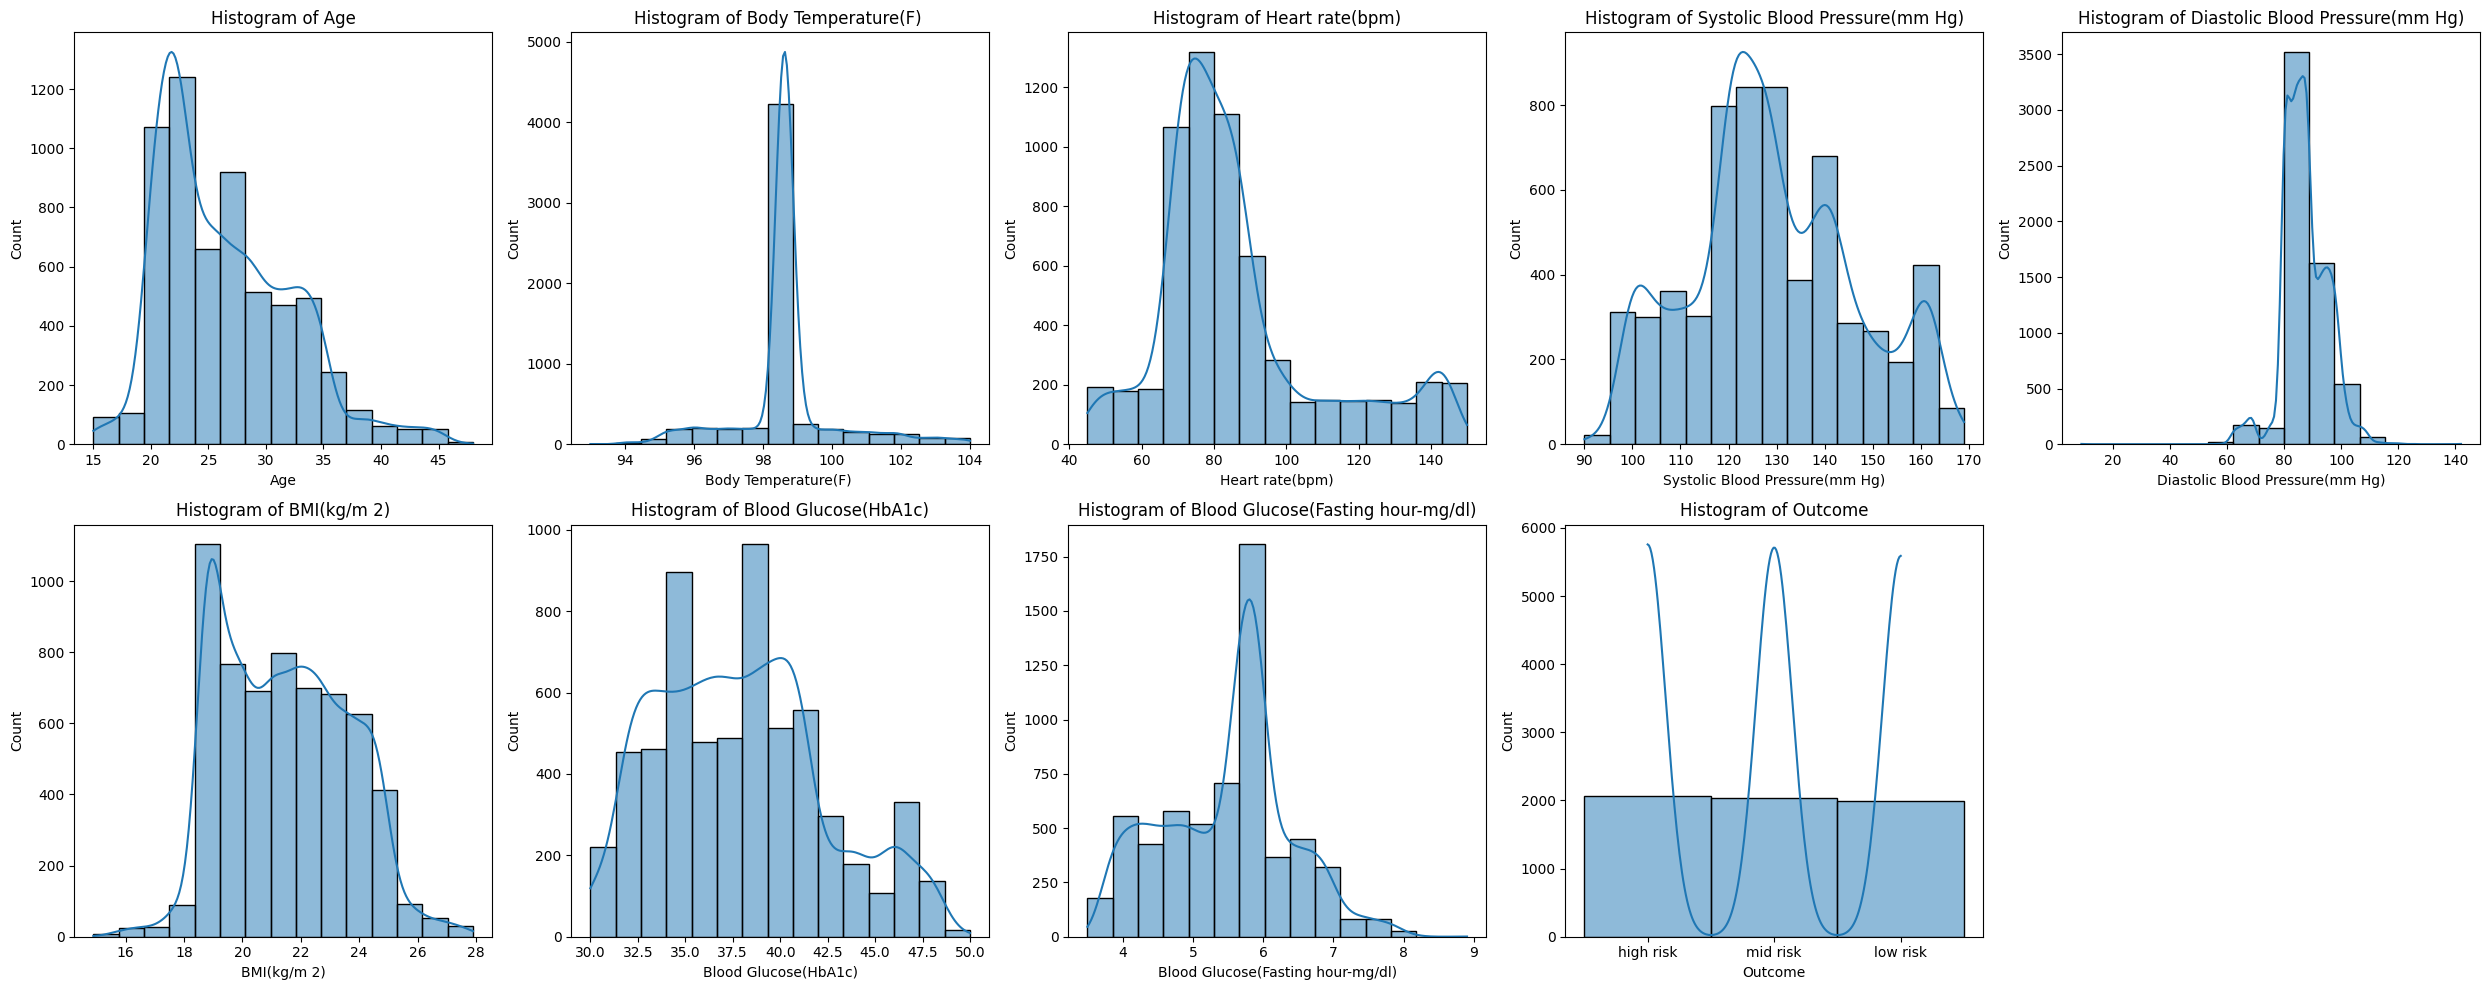

In [21]:
# List of columns to analyze
columns = ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
           'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
           'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
           'Blood Glucose(Fasting hour-mg/dl)', 'Outcome']

# Print available columns to check for typos or case sensitivity
print(df.columns)

# Number of columns to display (based on how many columns you have)
num_plots = len(columns)

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = int(np.ceil(num_plots / num_rows))  # Automatically calculate the number of columns

# Create subplots with 2 rows and calculated columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten axes array if needed (in case the number of plots is less than the grid size)
axes = axes.flatten()

# Loop through each column and plot histogram
for i, col in enumerate(columns):
    # Check if the column exists in the DataFrame before accessing it
    if col in df.columns:
        # Plotting the histogram and KDE
        sns.histplot(df[col], bins=15, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
    else:
        print(f"Column '{col}' not found in the DataFrame.")
        axes[i].set_title(f"Column '{col}' not found")

# Hide unused axes (if there are fewer columns than subplots)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()



# Bivariates Analysis

**In this bivariate analysis, we will explore the relationship between two variables, typically between each feature and the target variable**

In [22]:
#Functions to plot distribution of each features with target variable
def plot_distrbution(df,column, hue= None):
    fig, axes =plt.subplots(1,3, figsize=(20,5))
    sns.kdeplot(data=df, x=column , fill=True, ax=axes[0], hue=hue)
    if(hue):
        sns.boxplot(data=df, x=hue, ax=axes[1],y=column)
    else:
        sns.boxplot(data=df, x=column, ax=axes[1] )
    sns.histplot(data=df, x=column , bins=15, kde=False, ax=axes[2],hue=hue)
    plt.suptitle(f'Distribution of the {column}')

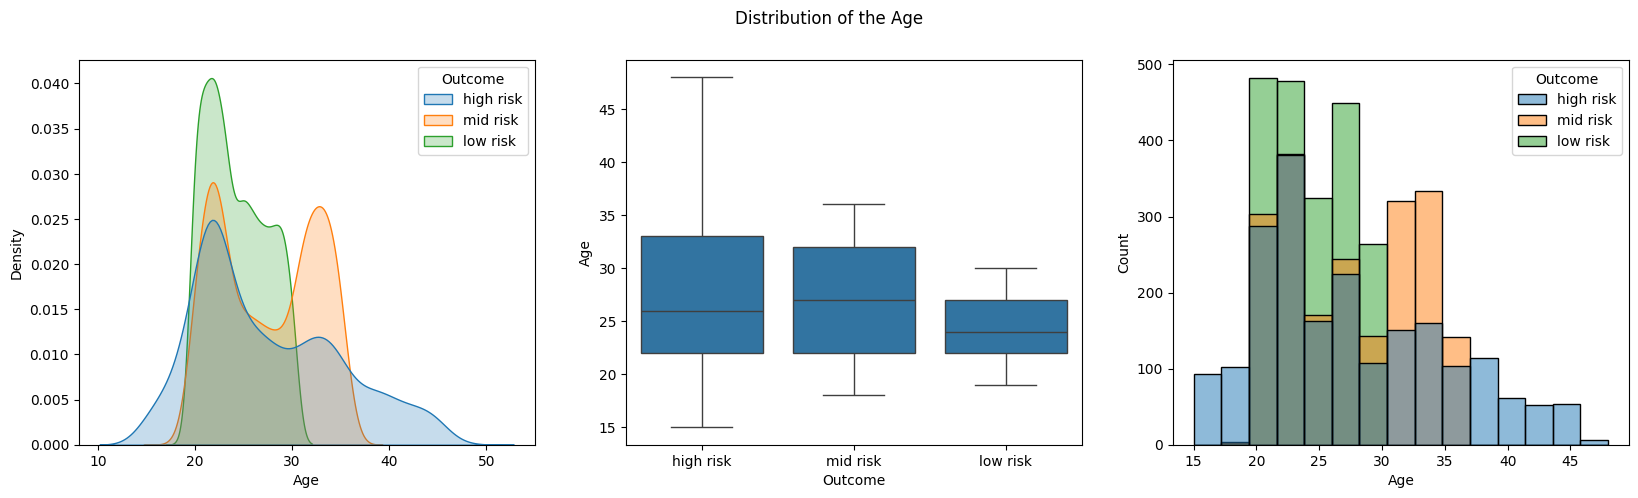

In [23]:
plot_distrbution(df, column='Age', hue='Outcome')

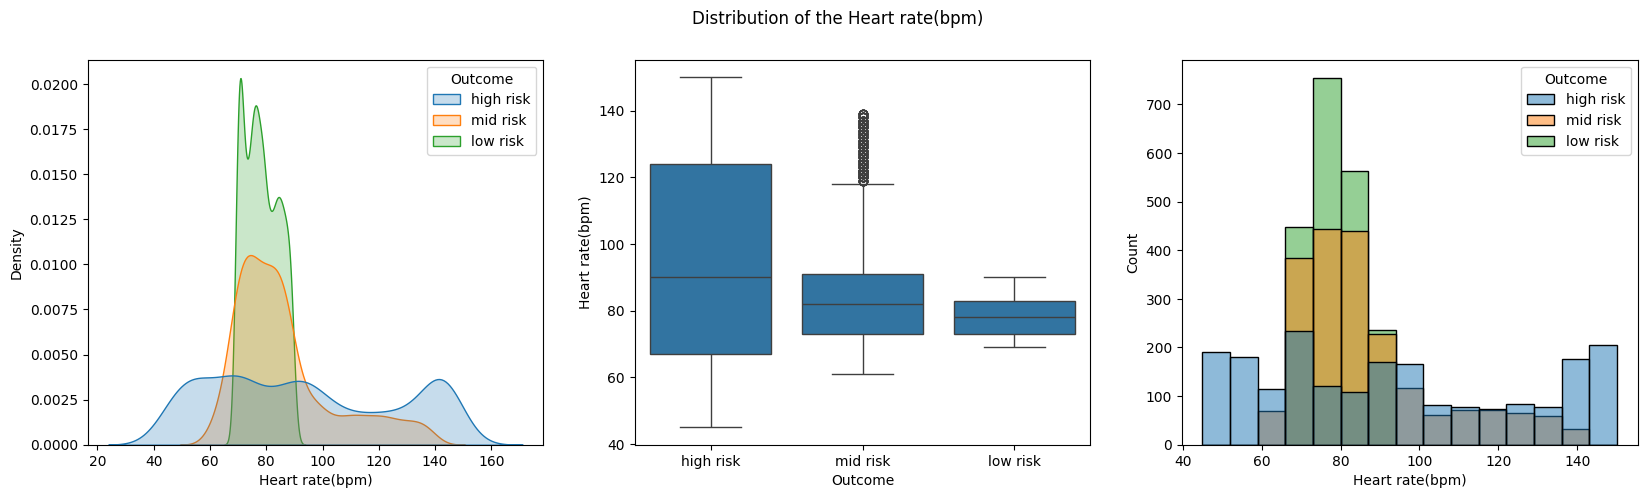

In [24]:
plot_distrbution(df, column='Heart rate(bpm)', hue='Outcome')

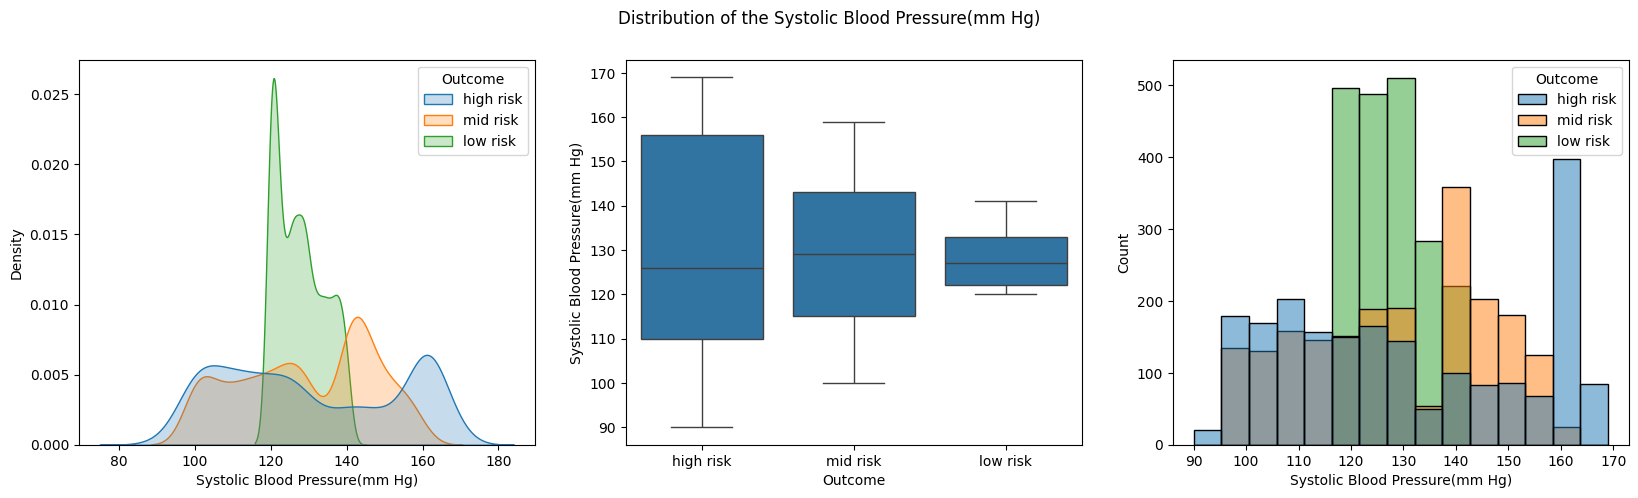

In [25]:
plot_distrbution(df, column='Systolic Blood Pressure(mm Hg)', hue='Outcome')

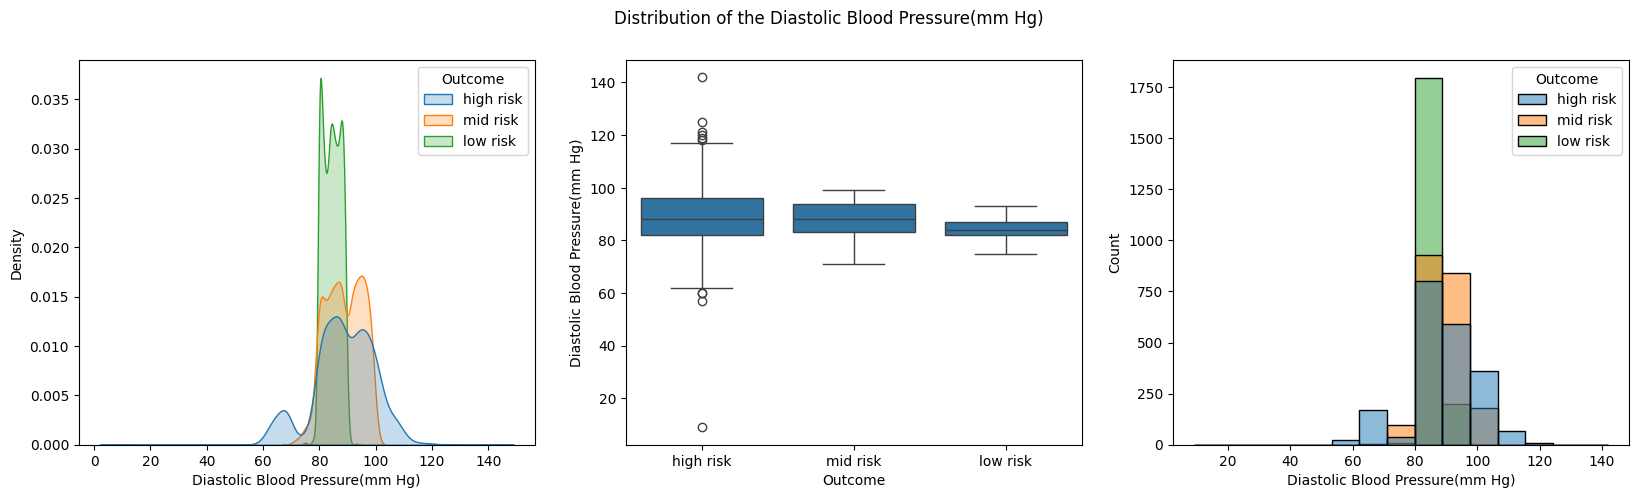

In [26]:
plot_distrbution(df, column='Diastolic Blood Pressure(mm Hg)', hue='Outcome')

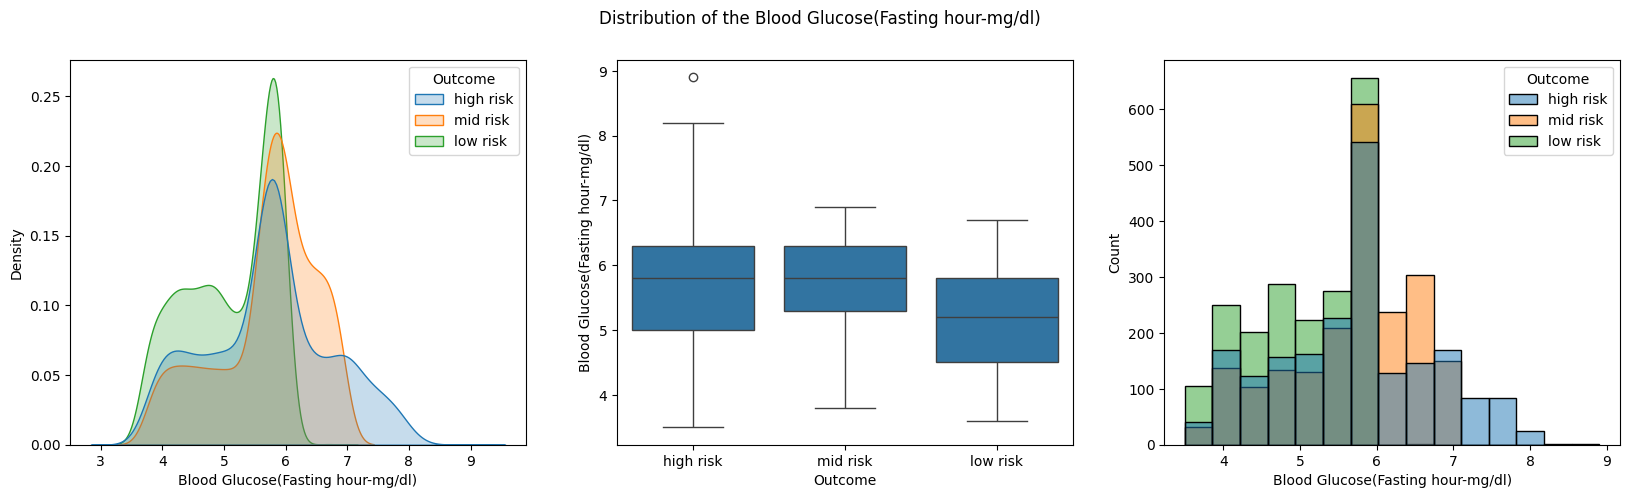

In [27]:
plot_distrbution(df, column='Blood Glucose(Fasting hour-mg/dl)', hue='Outcome')

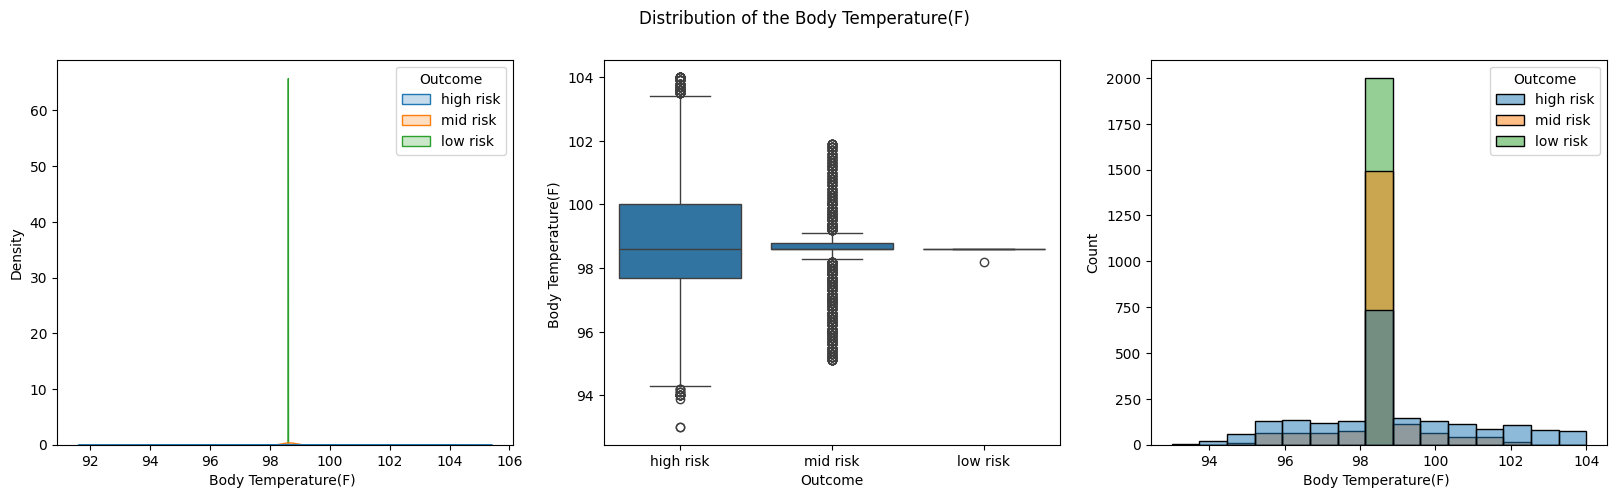

In [28]:
plot_distrbution(df=df, column='Body Temperature(F) ', hue='Outcome')

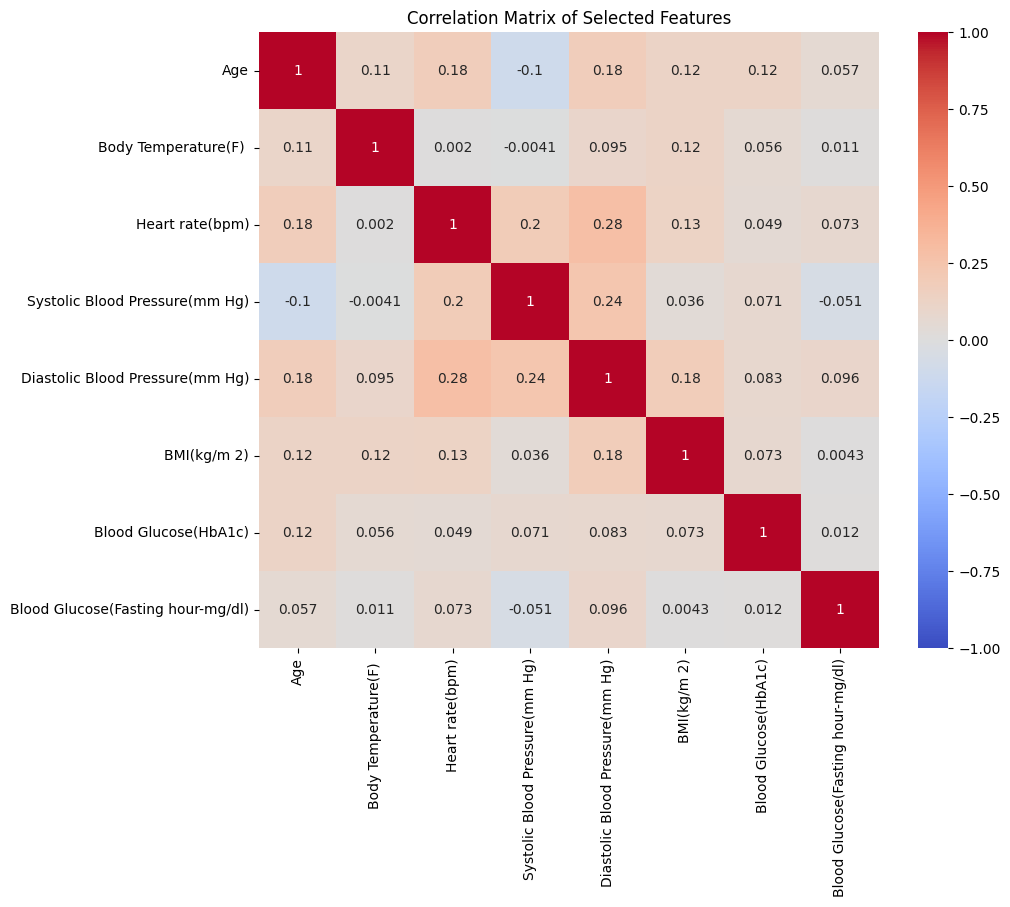

In [29]:
# Define the columns for correlation analysis
columns = ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
           'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
           'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
           'Blood Glucose(Fasting hour-mg/dl)']

# Calculate the correlation matrix
correlation_matrix = df[columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()


# Multivariate

**In this multivariate analysis, we will examine the relationships between three or more variables simultaneously to understand their interactions correlations, and combined effects on the target variable**

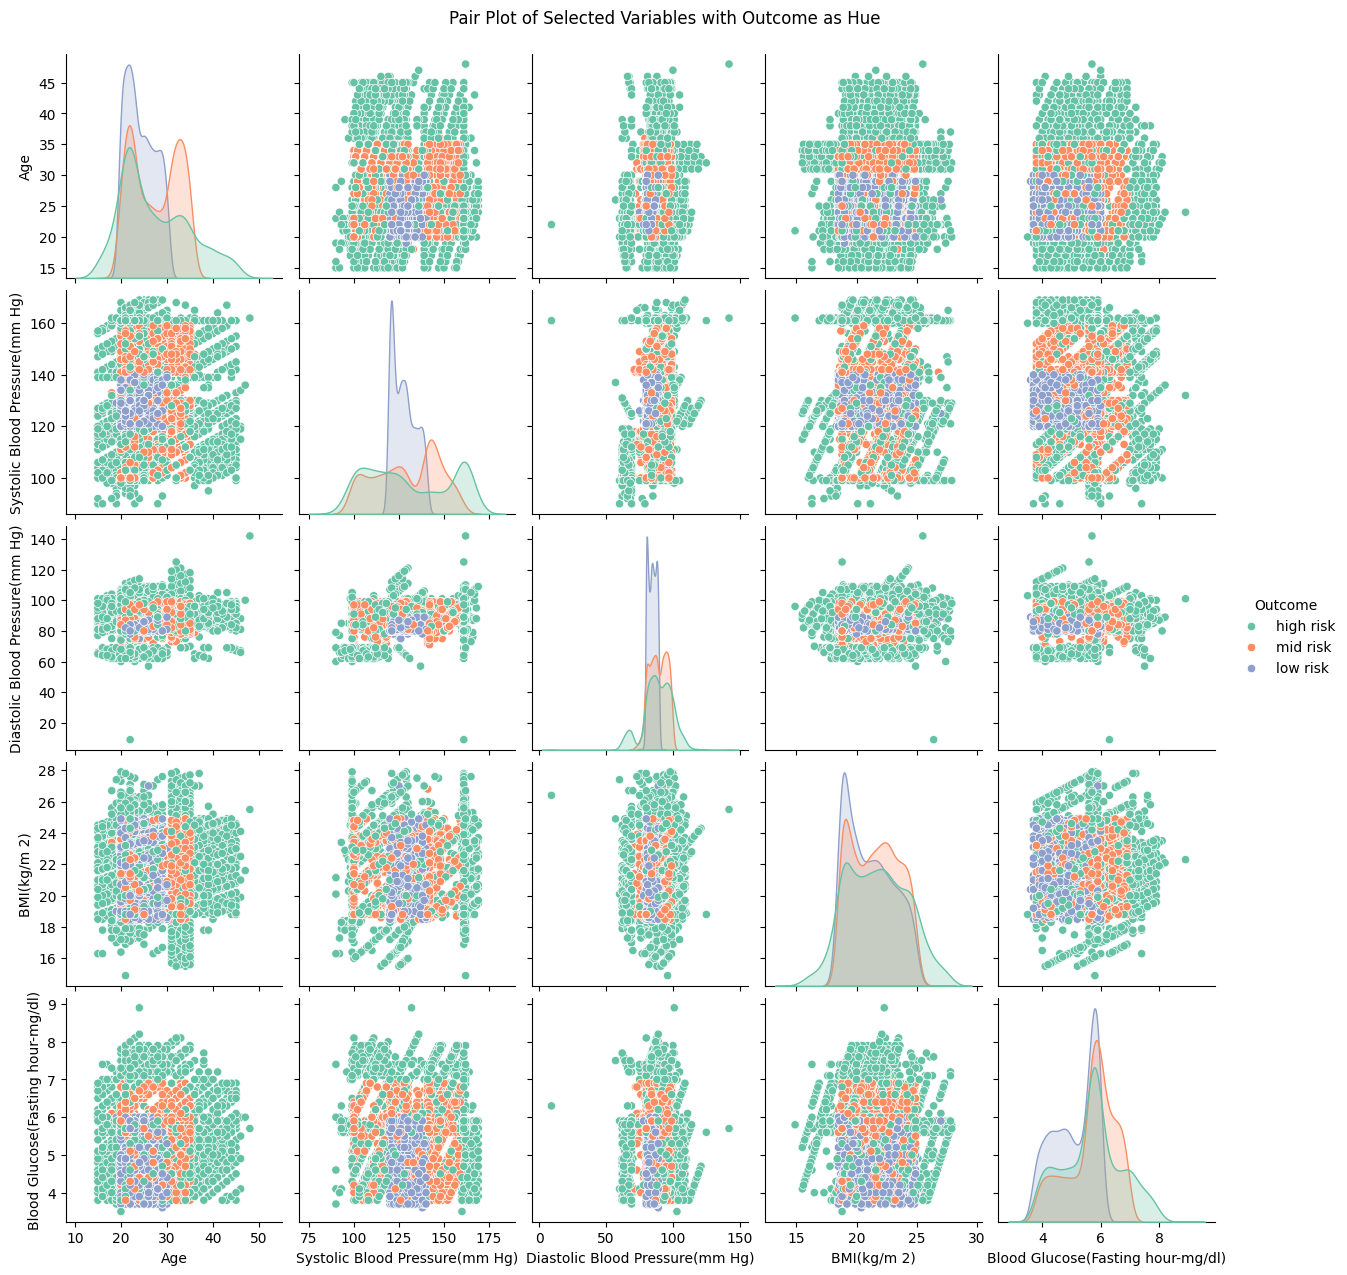

In [30]:
# Selecting the relevant columns and ensuring Outcome is included for color differentiation
selected_columns = ['Age', 'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                    'BMI(kg/m 2)', 'Blood Glucose(Fasting hour-mg/dl)', 'Outcome']

# Plotting the pair plot with 'Outcome' as the hue for color differentiation
sns.pairplot(df[selected_columns], hue='Outcome', palette='Set2', diag_kind='kde')

# Display the plot
plt.suptitle('Pair Plot of Selected Variables with Outcome as Hue', y=1.02)  # Adjust title position if needed
plt.show()


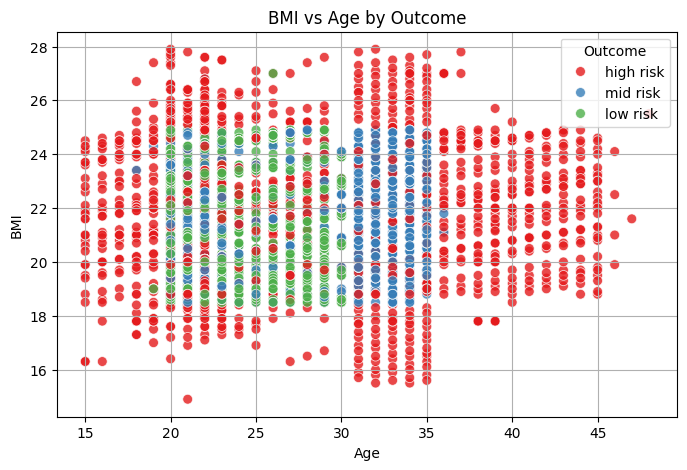

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='BMI(kg/m 2)', hue='Outcome', palette='Set1', s=50, alpha=0.8)
plt.title("BMI vs Age by Outcome")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title='Outcome', loc='upper right')
plt.grid(True)
plt.show()

# Model Training and Evaluation

**Model** **Selection**

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from imblearn.over_sampling import SMOTE

In [33]:
Outcome = {'low risk':0,
        'mid risk':1,
        'high risk':2}

# apply using map
df['Outcome'] = df['Outcome'].map(Outcome)#.astype(int)
df.head(5)

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,20,97.5,91,161,100,24.9,41,5.8,2
1,45,97.7,99,99,94,22.1,36,5.7,2
2,29,98.6,84,129,87,19.0,42,6.4,1
3,26,99.5,135,161,101,23.7,46,4.5,2
4,38,102.5,51,106,91,18.8,38,4.3,2


In [34]:
df['Outcome'].value_counts()

,count
Outcome,
2,2059
1,2043
0,1999


In [35]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [36]:
x

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
0,20,97.5,91,161,100,24.9,41,5.8
1,45,97.7,99,99,94,22.1,36,5.7
2,29,98.6,84,129,87,19.0,42,6.4
3,26,99.5,135,161,101,23.7,46,4.5
4,38,102.5,51,106,91,18.8,38,4.3
...,...,...,...,...,...,...,...,...
6098,24,96.0,101,142,97,20.3,39,6.7
6099,38,96.0,59,129,94,20.0,39,7.0
6100,40,103.3,145,123,95,24.6,36,5.0
6101,21,99.0,130,152,99,23.2,47,6.6


In [37]:
y

,Outcome
0,2
1,2
2,1
3,2
4,2
...,...
6098,1
6099,2
6100,2
6101,2


In [38]:
#Splitting The Dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [39]:
print(f'Training Shape x:',x_train.shape)
print(f'Testing Shape x:',x_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',y_train.shape)
print(f'Testing Shape y:',y_test.shape)

Training Shape x: (4575, 8)
Testing Shape x: (1526, 8)
*****___________*****___________*****
Training Shape y: (4575,)
Testing Shape y: (1526,)


In [40]:
#StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)

x_test= ss.transform(x_test)

In [41]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
print("\n=== Logistic Regression ===")
print("Train Accuracy:", log_reg.score(x_train, y_train))
print("Test Accuracy:", log_reg.score(x_test, y_test))
y_pred = log_reg.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print("\n=== k-NN ===")
print("Train Accuracy:", knn.score(x_train, y_train))
print("Test Accuracy:", knn.score(x_test, y_test))
y_pred = knn.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
print("\n=== Random Forest ===")
print("Train Accuracy:", random_forest.score(x_train, y_train))
print("Test Accuracy:", random_forest.score(x_test, y_test))
y_pred = random_forest.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Label Encoding for XGBoost
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# XGBoost
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train, y_train)
print("\n=== XGBoost ===")
print("Train Accuracy:", xgb_clf.score(x_train, y_train))
print("Test Accuracy:", xgb_clf.score(x_test, y_test))
y_pred = xgb_clf.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0, class_weight='balanced', probability=True)
svm.fit(x_train, y_train)
print("\n=== SVM ===")
print("Train Accuracy:", svm.score(x_train, y_train))
print("Test Accuracy:", svm.score(x_test, y_test))
y_pred = svm.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))



=== Logistic Regression ===
Train Accuracy: 0.5704918032786885
Test Accuracy: 0.5543905635648755
Confusion Matrix:
 [[360  87  45]
 [127 263 151]
 [142 128 223]]
Accuracy: 55.44%
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.73      0.64       492
           1       0.55      0.49      0.52       541
           2       0.53      0.45      0.49       493

    accuracy                           0.55      1526
   macro avg       0.55      0.56      0.55      1526
weighted avg       0.55      0.55      0.55      1526


=== k-NN ===
Train Accuracy: 0.9433879781420765
Test Accuracy: 0.9115334207077327
Confusion Matrix:
 [[489   3   0]
 [ 29 489  23]
 [ 15  65 413]]
Accuracy: 91.15%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       492
           1       0.88      0.90      0.89       541
           2       0.95      0.84      0.89       493

    accu

In [42]:
# Example accuracies for demonstration; replace these with actual calculated values
accuracy_train = {
    "Logistic Regression": 0.56,
    "KNN": 0.94,
    "SVM": 0.94,
    "Random Forest": 1.0,
    "XGBoost": 1.0
}

accuracy_test = {
    "Logistic Regression": 0.55,
    "KNN": 0.91,
    "SVM": 0.92,
    "Random Forest": 0.99,
    "XGBoost": 0.99
}

# Displaying accuracies in a structured format
print("Training and Test Accuracy for Each Model:")
for model_name in accuracy_train:
    print(f"{model_name}: Training Accuracy = {accuracy_train[model_name]}, Test Accuracy = {accuracy_test[model_name]}")


Training and Test Accuracy for Each Model:
Logistic Regression: Training Accuracy = 0.56, Test Accuracy = 0.55
KNN: Training Accuracy = 0.94, Test Accuracy = 0.91
SVM: Training Accuracy = 0.94, Test Accuracy = 0.92
Random Forest: Training Accuracy = 1.0, Test Accuracy = 0.99
XGBoost: Training Accuracy = 1.0, Test Accuracy = 0.99


In [43]:
x_train

array([[-0.24104867, -0.07720426, -0.70585757, ..., -1.22942639,
        -0.21238292,  0.33366208],
       [-1.46327535, -0.07720426,  0.42827035, ..., -1.69236807,
         1.36643861,  0.44347461],
       [ 0.10815895, -0.14860299,  1.73687949, ...,  0.62234035,
        -0.88902072,  0.77291221],
       ...,
       [-0.24104867,  0.20839065,  1.47515766, ...,  0.52975201,
         0.46425487,  1.4317874 ],
       [-0.93946391,  0.06559319, -0.70585757, ...,  2.93704877,
        -1.79120445,  0.44347461],
       [ 1.33038563, -0.07720426, -0.051553  , ...,  1.22416454,
         0.23870894,  1.32197487]])

In [44]:
#to save a model
import joblib

#Save each model to a separate file
joblib.dump(log_reg, 'log_reg.pkl')
joblib.dump(knn, 'knn.pkl')
joblib.dump(svm, 'svm.pkl')
joblib.dump(random_forest, 'random_forest.pkl')
joblib.dump(xgb_clf, 'xgb_clf.pkl')
print("Models have been saved successfully.")

# Load model
logistic_regression_model = joblib.load('log_reg.pkl')
knn_model = joblib.load('knn.pkl')
svm_model = joblib.load('svm.pkl')
random_forest_model = joblib.load('random_forest.pkl')
xgboost_model = joblib.load('xgb_clf.pkl')


Models have been saved successfully.


# Feature Importance

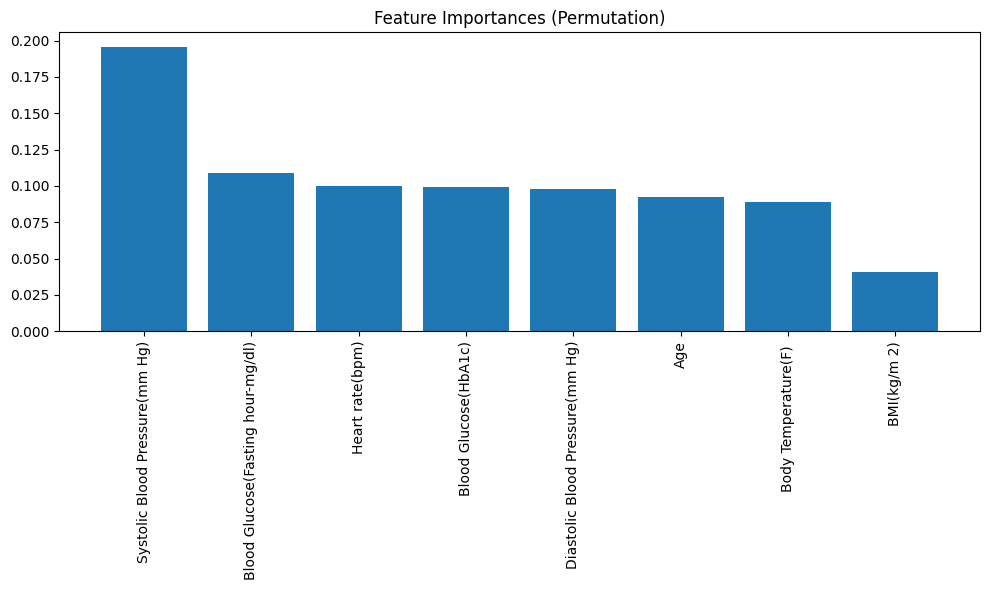

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Assuming 'svm' is your trained SVC model and 'x_test', 'y_test' are your test data

# Calculate permutation feature importance
result = permutation_importance(svm, x_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
indices = np.argsort(importances)[::-1]
feature_names = x.columns  # Assuming 'x' is your DataFrame with feature names

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Permutation)")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Import New Dataset

In [46]:
from google.colab import files
uploaded = files.upload()

Saving validation.csv to validation.csv


In [47]:
new_data = pd.read_csv('validation.csv')

In [48]:
new_data.rename(columns={'Body_Temperature': 'Body Temperature(F) '}, inplace=True)

In [49]:
new_data

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,25,98,86,130,80,24.9,46,6.7,2
1,35,98,70,140,90,22.1,34,4.4,2
2,29,100,80,90,70,19.0,41,5.8,2
3,30,98,70,140,85,23.7,33,4.7,2
4,35,98,76,120,60,18.8,44,6.2,0
5,23,98,70,140,80,22.0,36,5.8,2
6,23,98,78,130,70,18.8,32,6.0,1
7,35,102,86,85,60,24.8,44,7.1,2
8,32,98,70,120,90,24.7,41,6.3,1


In [50]:
# Assuming 'Outcome' is the target variable as per your original dataset
X_validation = new_data.drop('Outcome', axis=1)
y_validation = new_data['Outcome']

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
# Apply the same transformations
X_validation_scaled = ss.transform(X_validation)

In [53]:
X_train_test, X_validation, y_train_test, y_validation = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler

# Refit or use previously saved scaler
ss = StandardScaler()
X_validation_scaled = ss.fit_transform(X_validation)

print("Shape after scaling:", X_validation_scaled.shape)


Shape after scaling: (1221, 8)


In [55]:
# Make predictions on the validation set
lr_validation_predictions = log_reg.predict(X_validation_scaled)
knn_validation_predictions = knn.predict(X_validation_scaled)
svm_validation_predictions = svm.predict(X_validation_scaled)
rf_validation_predictions = random_forest.predict(X_validation_scaled)
xgb_validation_predictions = xgb_clf.predict(X_validation_scaled)


# Evaluate your models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression Evaluation
print("Logistic Regression Validation Accuracy:", accuracy_score(y_validation, lr_validation_predictions))
print("Logistic Regression Classification Report:")
print(classification_report(y_validation, lr_validation_predictions, zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_validation, lr_validation_predictions))

print("\nKNN Validation Accuracy:", accuracy_score(y_validation, knn_validation_predictions))
print("KNN Classification Report:")
print(classification_report(y_validation, knn_validation_predictions,zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_validation, knn_validation_predictions))

print("\nSVM Validation Accuracy:", accuracy_score(y_validation, svm_validation_predictions))
print("SVM Classification Report:")
print(classification_report(y_validation, svm_validation_predictions,zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_validation, svm_validation_predictions))

print("\nRandom Forest Validation Accuracy:", accuracy_score(y_validation, rf_validation_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_validation, rf_validation_predictions,zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_validation, rf_validation_predictions))

print("\nXGBoost Validation Accuracy:", accuracy_score(y_validation, xgb_validation_predictions))
print("XGBoost Classification Report:")
print(classification_report(y_validation, xgb_validation_predictions,zero_division=1))
print("Confusion Matrix:")
print(confusion_matrix(y_validation, xgb_validation_predictions))


Logistic Regression Validation Accuracy: 0.5552825552825553
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.75      0.66       399
           1       0.56      0.44      0.49       425
           2       0.51      0.48      0.49       397

    accuracy                           0.56      1221
   macro avg       0.55      0.56      0.55      1221
weighted avg       0.55      0.56      0.55      1221

Confusion Matrix:
[[300  55  44]
 [ 98 187 140]
 [113  93 191]]

KNN Validation Accuracy: 0.914004914004914
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       399
           1       0.88      0.91      0.89       425
           2       0.96      0.84      0.90       397

    accuracy                           0.91      1221
   macro avg       0.92      0.91      0.91      1221
weighted avg       0.92      0.91      0.91      1221



# Model deployment

# SVM (Support Vector Machine) Classifier

In [57]:
# Load the saved SVM model
svm_model = joblib.load('svm.pkl')

# Define the feature names (match the training data columns)
feature_names = [
    'Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)','Blood Glucose(Fasting hour-mg/dl)'
]


# Initialize LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Function to get user input
def get_user_input():
    print("Enter the input values for prediction:")
    age = float(input("Age: "))
    body_temp = float(input("Body Temperature (F): "))
    heart_rate = float(input("Heart Rate (bpm): "))
    systolic_bp = float(input("Systolic Blood Pressure (mm Hg): "))
    diastolic_bp = float(input("Diastolic Blood Pressure (mm Hg): "))
    bmi = float(input("BMI (kg/m^2): "))
    blood_glucose = float(input("Blood Glucose (HbA1c): "))
    blood_glucose_fasting = float(input("Blood Glucose (Fasting hour-mg/dl): "))

    # Return input as a DataFrame with feature names
    return pd.DataFrame([[age, body_temp, heart_rate, systolic_bp, diastolic_bp, bmi, blood_glucose, blood_glucose_fasting]], columns=feature_names)

# Main loop for continuous predictions
while True:
    # Get user input
    new_input = get_user_input()

    # Scale the input
    new_input_scaled = ss.transform(new_input)

    # Make prediction
    prediction = svm_model.predict(new_input_scaled)[0]
    prediction_category = le.inverse_transform([prediction])[0]

    # Display the result
    print("\nPredicted risk category:", prediction_category)

    # Ask if the user wants to continue
    continue_choice = input("\nEnter 1 to predict for another data or 0 to exit: ")
    if continue_choice == '0':
        print("bye!")
        break


Enter the input values for prediction:
Age: 24
Body Temperature (F): 98.6
Heart Rate (bpm): 124
Systolic Blood Pressure (mm Hg): 90
Diastolic Blood Pressure (mm Hg): 88
BMI (kg/m^2): 19
Blood Glucose (HbA1c): 47
Blood Glucose (Fasting hour-mg/dl): 4.8

Predicted risk category: 2

Enter 1 to predict for another data or 0 to exit: 0
bye!
